 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path('../../Pandas_HW/CSV_data/whale_returns.csv')
algo_returns_csv = Path('../../Pandas_HW/CSV_data/algo_returns.csv')
sp500_returns_csv = Path('../../Pandas_HW/CSV_data/sp500_history.csv')
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
# YOUR CODE HERE
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
# YOUR CODE HERE`
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
# YOUR CODE HERE
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
# YOUR CODE HERE
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
# YOUR CODE HERE
type(sp500_df)

pandas.core.frame.DataFrame

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_df.isna().sum()

Close    0
dtype: int64

In [12]:
sp500_df.dropna(inplace=True)
sp500_df.isna().sum()

Close    0
dtype: int64

In [13]:
#Removing the $ which has tripped me up for the last hour.
sp500_df[sp500_df.columns[0]] = sp500_df[sp500_df.columns[0]].replace('[\$,]', '', regex=True).astype(float)

In [14]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace=True)
sp500_returns.dropna(inplace=True)
sp500_df.isna().sum()

Close    0
dtype: int64

In [16]:
# Rename Column
# YOUR CODE HERE
sp500_df = sp500_df.rename(columns={'Close': 'S&P 500'})
sp500_df.head()

,S&P 500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [171]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
concat_ports = pd.concat([sp500_returns, whale_df, algo_df], axis='columns', join='inner')
concat_ports.head()

,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572


---

In [172]:
#Reversing the date index to axcending
ports_corrected = concat_ports.sort_index(axis=1 ,ascending=True)
ports_corrected = ports_corrected.iloc[::-1]
ports_corrected.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,Close,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,0.004408,-0.004981,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,-0.001195,0.003241,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.014378,0.004076,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003929,-0.003574,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.017254,0.004225,0.000582,0.005843


In [197]:
ports_corrected.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-22'],
              dtype='datetime64[ns]', name='Date', length=1042, freq=None)

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

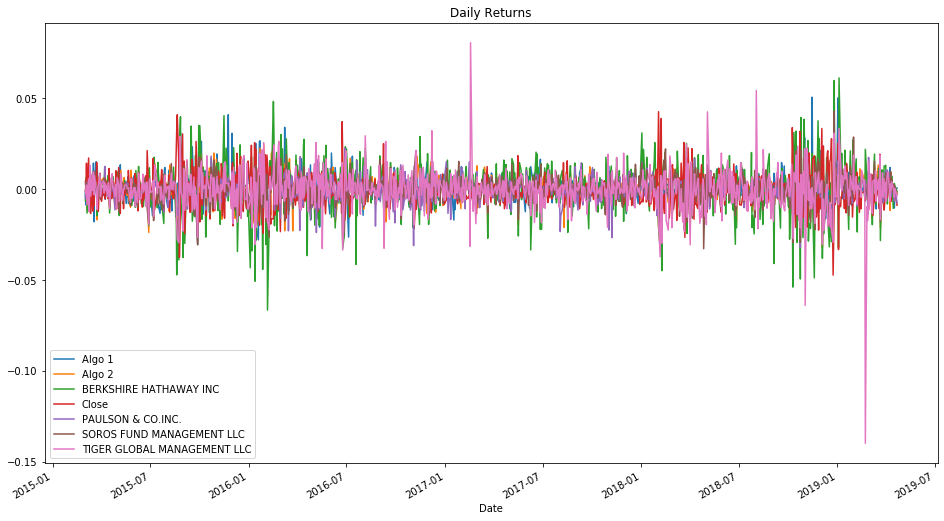

In [19]:
# Plot daily returns
# YOUR CODE HERE
ports_corrected.plot(figsize = (16,9), title = 'Daily Returns')

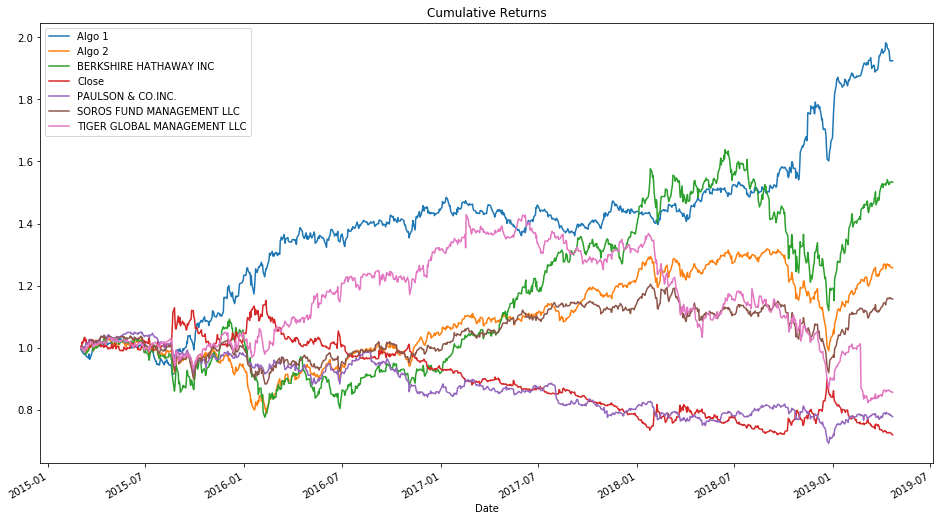

In [20]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + ports_corrected).cumprod()
cumulative_returns.plot(figsize= (16,9), title= 'Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

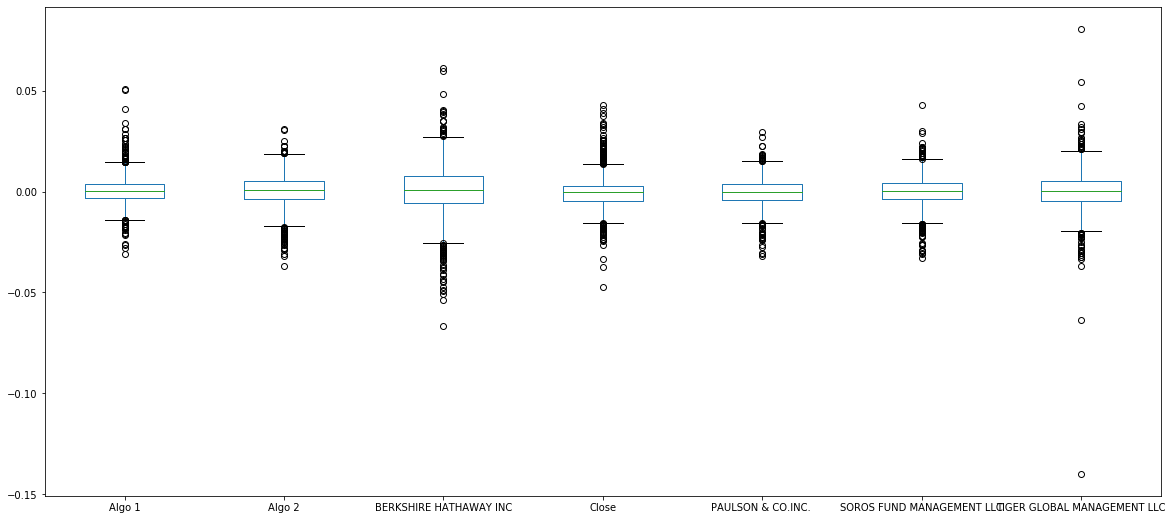

In [38]:
# Box plot to visually show risk
# YOUR CODE HERE
ports_corrected.plot.box(figsize = (20,9))

In [39]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = ports_corrected.std()
daily_std.head()

Algo 1                    0.007623
Algo 2                    0.008341
BERKSHIRE HATHAWAY INC    0.012919
Close                     0.008587
PAULSON & CO.INC.         0.007026
dtype: float64

In [43]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
'Algo 1' > 'S&P500'

True

In [42]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.sample(6)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
BERKSHIRE HATHAWAY INC         0.205079
Close                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

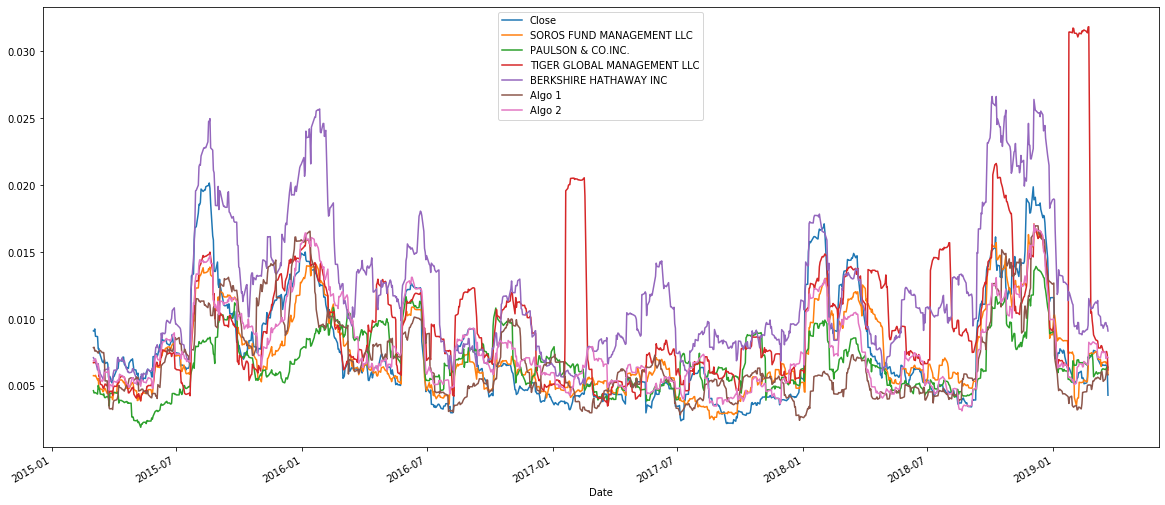

In [47]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
concat_ports.rolling(window=21).std().plot(figsize=(20,9))

In [48]:
# Construct a correlation table
# YOUR CODE HERE
correlation = concat_ports.corr()
correlation

,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Close,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


In [50]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
bk_covariance = concat_ports['BERKSHIRE HATHAWAY INC'].cov(concat_ports['Close'])
sp500_variance = concat_ports['Close'].var()
bk_beta = bk_covariance / sp500_variance
print(bk_beta)

-0.020846489408902612


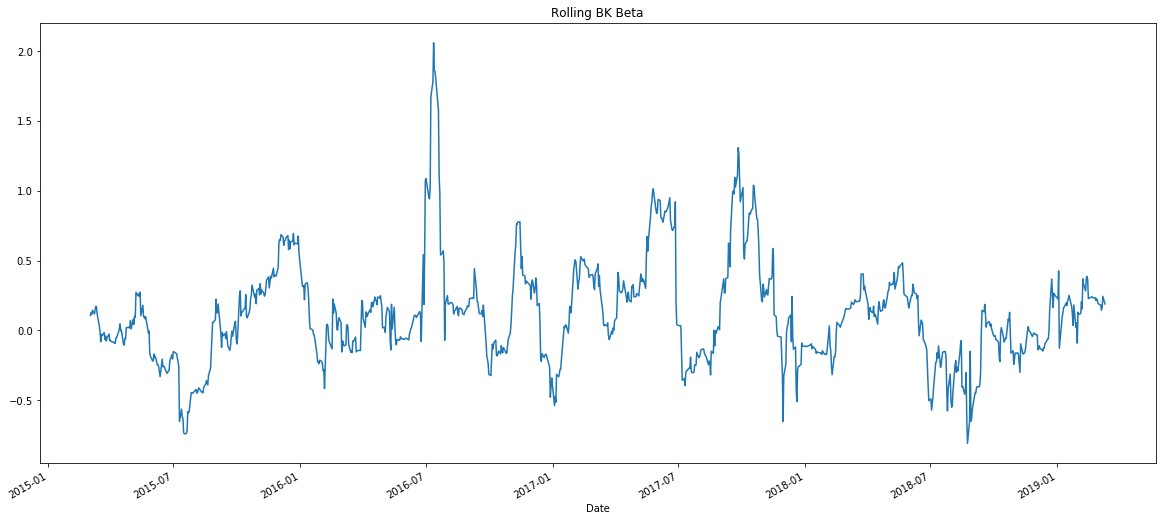

In [53]:
rolling_bk_covariance = concat_ports['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(concat_ports['Close'])
rolling_variance = concat_ports['Close'].rolling(window=30).var()
rolling_bk_beta = rolling_bk_covariance / rolling_variance
rolling_bk_beta.plot(figsize = (20,9), title = 'Rolling BK Beta')

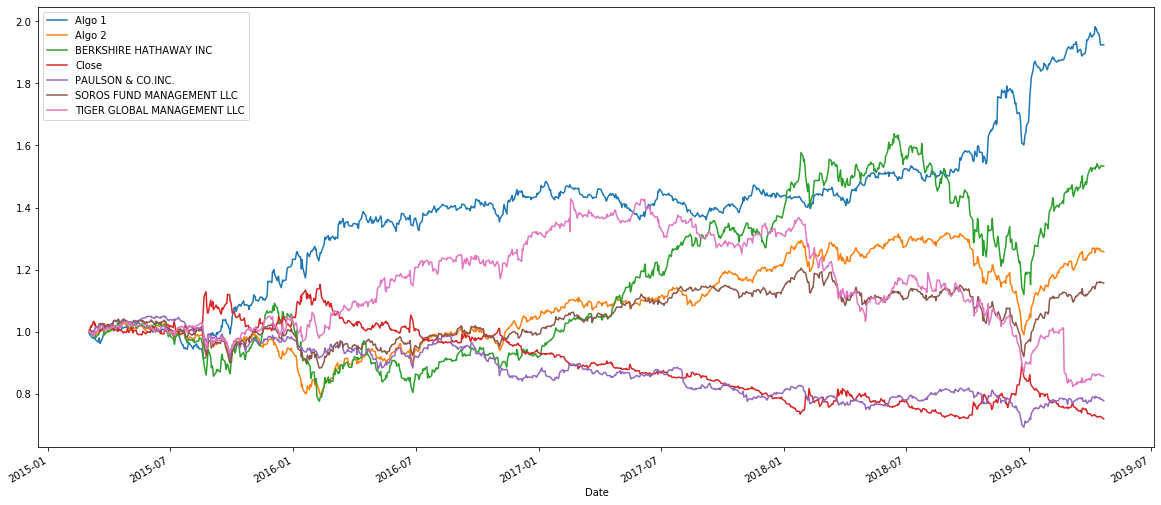

In [65]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
wma_ports = pd.Series.ewm(cumulative_returns, span = 1).mean()
wma_ports.plot(figsize = (20,9))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [67]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (concat_ports.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratio.head()

Algo 1                    1.369589
Algo 2                    0.484334
BERKSHIRE HATHAWAY INC    0.606743
Close                    -0.518582
PAULSON & CO.INC.        -0.491422
dtype: float64

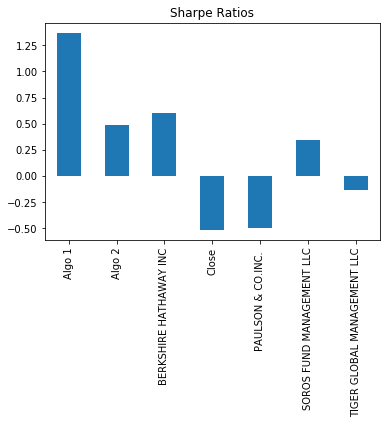

In [68]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot.bar(title = 'Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [161]:
# Read the first stock
# YOUR CODE HERE
msft_csv = Path('../../Pandas_HW/CSV_data/MSFT.csv')
msft_df = pd.read_csv(msft_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
msft_df.head()

,MSFT
Date,
2015-01-02,46.76
2015-01-05,46.33
2015-01-06,45.65
2015-01-07,46.23
2015-01-08,47.59


In [162]:
# Read the second stock
# YOUR CODE HERE
tsla_csv = Path('../../Pandas_HW/CSV_data/TSLA.csv')
tsla_df = pd.read_csv(tsla_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df.head()

,Close
Date,
2015-01-02,219.31
2015-01-05,210.09
2015-01-06,211.28
2015-01-07,210.95
2015-01-08,210.62


In [163]:
# Read the third stock
# YOUR CODE HERE
amd_csv = Path('../../Pandas_HW/CSV_data/AMD.csv')
amd_df = pd.read_csv(amd_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_df.head()

,Close
Date,
2015-01-02,2.69
2015-01-05,2.66
2015-01-06,2.63
2015-01-07,2.58
2015-01-08,2.61


In [164]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_port = pd.concat([msft_df, tsla_df, amd_df], axis='columns', join='inner')
my_port.head()

,MSFT,Close,Close
Date,,,
2015-01-02,46.76,219.31,2.69
2015-01-05,46.33,210.09,2.66
2015-01-06,45.65,211.28,2.63
2015-01-07,46.23,210.95,2.58
2015-01-08,47.59,210.62,2.61


In [165]:
my_port.columns = ['MSFT', 'TSLA', 'AMD']
my_port.head()

,MSFT,TSLA,AMD
Date,,,
2015-01-02,46.76,219.31,2.69
2015-01-05,46.33,210.09,2.66
2015-01-06,45.65,211.28,2.63
2015-01-07,46.23,210.95,2.58
2015-01-08,47.59,210.62,2.61


In [166]:
# Drop Nulls
# YOUR CODE HERE
my_port.dropna(inplace=True)
my_port.isna().sum()

MSFT    0
TSLA    0
AMD     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [167]:
# Calculate weighted portfolio returns
w = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_port_ret = my_port.pct_change()[1:]
print(my_port_ret.head())

                MSFT      TSLA       AMD
Date                                    
2015-01-05 -0.009196 -0.042041 -0.011152
2015-01-06 -0.014677  0.005664 -0.011278
2015-01-07  0.012705 -0.001562 -0.019011
2015-01-08  0.029418 -0.001564  0.011628
2015-01-09 -0.008405 -0.018802  0.007663


In [168]:
my_port_weighted = (w * my_port_ret)
print(my_port_weighted.head())

                MSFT      TSLA       AMD
Date                                    
2015-01-05 -0.003065 -0.014014 -0.003717
2015-01-06 -0.004892  0.001888 -0.003759
2015-01-07  0.004235 -0.000521 -0.006337
2015-01-08  0.009806 -0.000521  0.003876
2015-01-09 -0.002802 -0.006267  0.002554


In [169]:
sum_my_port = my_port_weighted.sum(axis=1)
sum_my_port.head()

Date
2015-01-05   -0.020796
2015-01-06   -0.006764
2015-01-07   -0.002623
2015-01-08    0.013161
2015-01-09   -0.006515
dtype: float64

In [186]:
my_port_df = pd.DataFrame(sum_my_port)
my_port_df.tail()

,0
Date,
2019-12-23,0.021092
2019-12-24,0.012650
2019-12-26,0.007837
2019-12-27,-0.003041
2019-12-30,-0.019781


In [207]:
my_port_df.columns

Int64Index([0], dtype='int64')

In [209]:
my_port_df.rename(columns={0:'Custom'}, inplace=True)
my_port_df.head()

,Custom
Date,
2015-01-05,-0.020796
2015-01-06,-0.006764
2015-01-07,-0.002623
2015-01-08,0.013161
2015-01-09,-0.006515


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [210]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
#concat_ports = pd.concat([sp500_returns, whale_df, algo_df], axis='columns', join='inner')
cumulative_df = pd.concat([ports_corrected, my_port_df], axis='columns', join='inner')
cumulative_df.sample(10)

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,Close,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Custom
Date,,,,,,,,
2016-08-11,-0.000709,0.004823,0.000000,0.000797,0.000000,0.000000,0.000000,0.005138
2018-05-04,0.000648,0.008404,0.008794,-0.003446,0.006909,0.013363,0.042637,0.025833
2015-08-14,-0.005043,0.001775,0.012245,-0.005184,-0.000413,0.000401,0.004330,0.012117
2016-07-07,0.011133,0.000270,0.005831,-0.015024,0.000951,0.002406,-0.001836,0.001009
2018-07-12,-0.002782,0.004078,0.010917,-0.001078,0.004375,0.006349,0.002512,0.010814
2018-12-19,-0.010074,-0.014650,-0.015881,0.016025,-0.021254,-0.016731,-0.020559,-0.027819
2017-04-12,0.001635,-0.007078,0.001104,0.006861,-0.003205,-0.005125,0.008182,-0.022741
2018-02-13,-0.002735,0.005228,0.000000,-0.013225,0.000000,0.000000,0.000000,0.013844
2018-03-16,-0.006399,0.005486,0.000617,0.014409,0.004463,0.002788,0.000368,-0.002574


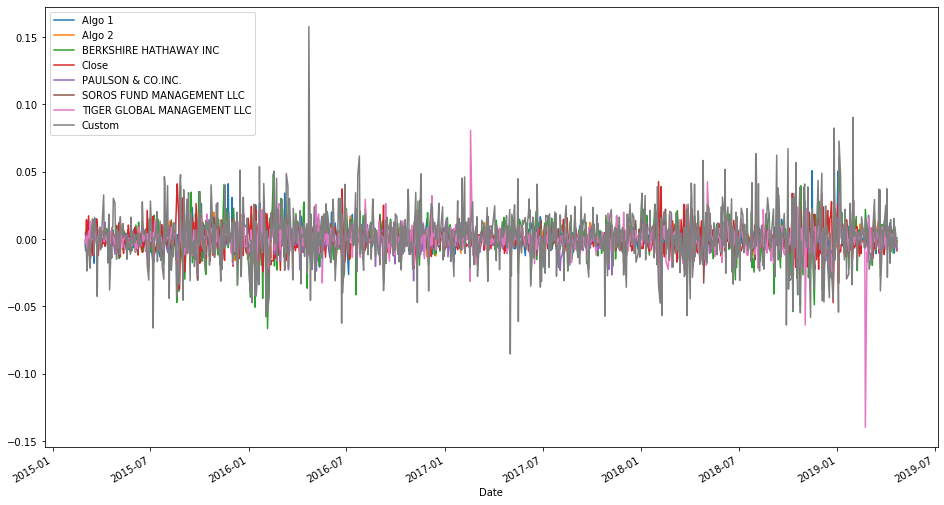

In [211]:
cumulative_df.plot(figsize = (16,9))

In [212]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
daily_std_all.dropna(inplace=True)
daily_std_all.isna().sum()

0

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [223]:
# Risk
# YOUR CODE HERE
daily_std_all = cumulative_df.std()
daily_std_all.sample(8)

Custom                         0.020717
PAULSON & CO.INC.              0.007026
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
TIGER GLOBAL MANAGEMENT LLC    0.010897
Close                          0.008587
Algo 2                         0.008341
dtype: float64

In [225]:
annualized_std_all = daily_std_all * np.sqrt(252)
annualized_std_all.sample(5)

PAULSON & CO.INC.     0.111527
Algo 1                0.121006
Custom                0.328879
Close                 0.136313
Algo 2                0.132413
dtype: float64

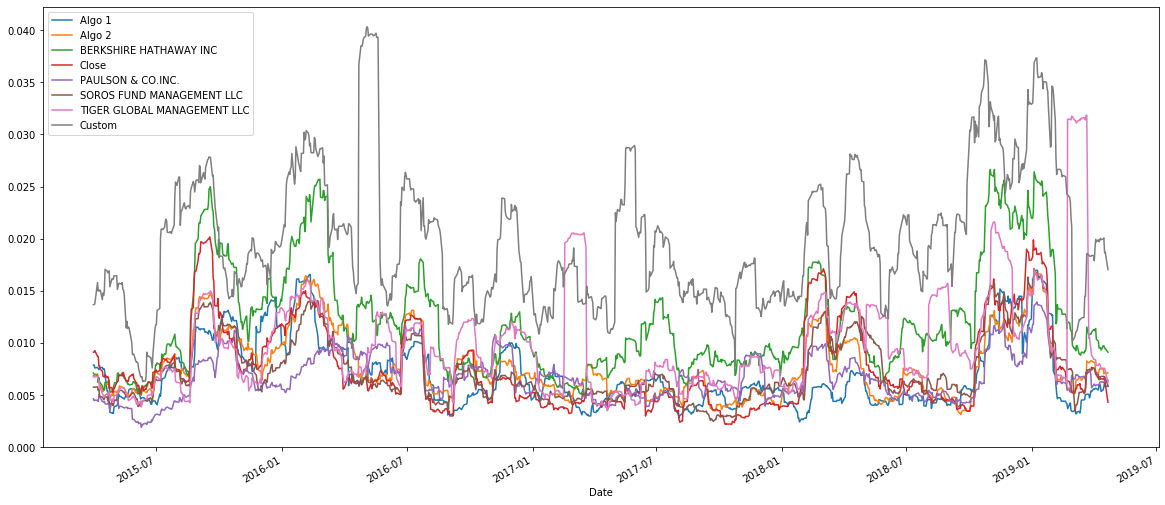

In [221]:
# Rolling
# YOUR CODE HERE
cumulative_df.rolling(window=21).std().plot(figsize=(20,9))

In [226]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio_all = (cumulative_df.mean() * 252) / (daily_std_all * np.sqrt(252))
sharpe_ratio_all.sample(8)

TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Custom                         1.202378
BERKSHIRE HATHAWAY INC         0.606743
Close                         -0.518582
Algo 1                         1.369589
PAULSON & CO.INC.             -0.491422
Algo 2                         0.484334
dtype: float64

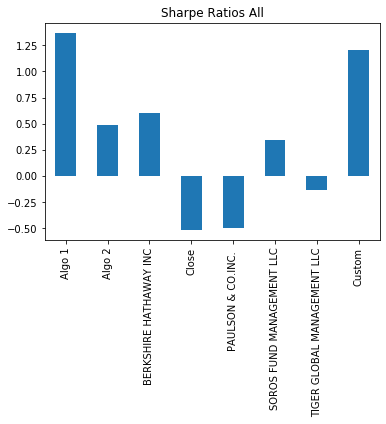

In [228]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_all.plot.bar(title = 'Sharpe Ratios All')

In [229]:
# Create a correlation analysis
# YOUR CODE HERE
correlation = cumulative_df.corr()
correlation

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,Close,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Custom
Algo 1,1.000000,0.287852,0.291678,-0.033963,0.268631,0.320901,0.164114,0.161556
Algo 2,0.287852,1.000000,0.687756,-0.002192,0.678085,0.826730,0.507160,0.563240
BERKSHIRE HATHAWAY INC,0.291678,0.687756,1.000000,-0.013856,0.545451,0.754157,0.424125,0.571465
Close,-0.033963,-0.002192,-0.013856,1.000000,0.013549,0.000574,-0.001505,0.015174
PAULSON & CO.INC.,0.268631,0.678085,0.545451,0.013549,1.000000,0.699823,0.434308,0.424273
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,0.754157,0.000574,0.699823,1.000000,0.561040,0.558639
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.424125,-0.001505,0.434308,0.561040,1.000000,0.365119
Custom,0.161556,0.563240,0.571465,0.015174,0.424273,0.558639,0.365119,1.000000


In [233]:
# Beta
# YOUR CODE HERE
#ports_corrected, my_port_df
#bk_covariance = concat_ports['BERKSHIRE HATHAWAY INC'].cov(concat_ports['Close'])
#sp500_variance = concat_ports['Close'].var()
#bk_beta = bk_covariance / sp500_variance
#print(bk_beta)
cumulative_df = cumulative_df['BERKSHIRE HATHAWAY INC'].cov(cumulative_df['Custom'])
custom_covar = my_port_df['Custom'].var()
beta_all = cumulative_df / custom_covar
print(beta_all)

0.36675870929654353


In [235]:
#rolling_bk_covariance = concat_ports['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(concat_ports['Close'])
#rolling_variance = concat_ports['Close'].rolling(window=30).var()
#rolling_bk_beta = rolling_bk_covariance / rolling_variance
#rolling_bk_beta.plot(figsize = (20,9), title = 'Rolling BK Beta')

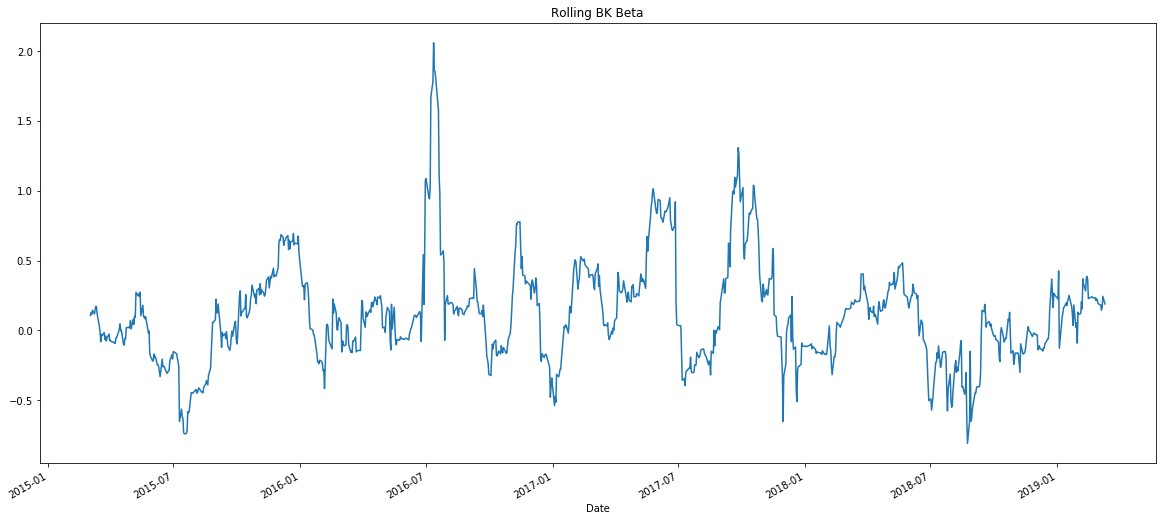

In [247]:
rolling_bk_covariance = concat_ports['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(concat_ports['Close'])
rolling_variance = concat_ports['Close'].rolling(window=30).var()
rolling_bk_beta = rolling_bk_covariance / rolling_variance
rolling_bk_beta.plot(figsize = (20,9), title = 'Rolling BK Beta')